<center>**KC Munnings (kcmunnin@iu.edu)**</center>

<center>**Indiana University**</center>

<center>**Spring 2018 - INFO I526, Applied Machine Learning**</center>

<center>**Project**</center>

***

If necessary, please download this notebook (with all directory files/data) at https://drive.google.com/open?id=1pbMIcV25CRQxgrtSfoycdMd6jC7QLGDg.  The file is ~2GB.

# A Comparison of image classification techniques and technologies on Cats and Dogs

## Abstract

Every day, machine learning is becoming more accessible and approachable to developers and individuals without deep expertise in computer science or mathematics.  In this project, I will be investigating the performance of highly accessible machine learning tools such as Microsoft’s Custom Vision Service against more traditional approaches such as custom, convolutional neural networks built with Keras and Tensorflow in Python.  I hope to test the hypothesis that organizations with limited funds or employee skillsets can still create useful machine learning models that yield comparable performance to more finely crafted models for some use cases.  

I will demonstrate this by creating models to classify species and breeds.  Such models could potentially assist with tagging “lost pet” posts on social media, which are very frequent in my suburban town outside of Indianapolis.  These models can also assist organizations such as animal shelters with automatically identifying and properly classifying animals that are taken in.  Animal service focused organizations are normally donor funded and very limited on funds, so cost effective approaches to solving problems with machine learning could be extremely useful to them.

## GANTT Chart

## Project Acceptance (3/29/2018)

Hi KC,



Congratulations! Your proposal has been accepted and you may now proceed to work on the project. 

The detailed feedback would be provided to you during the upcoming lab sessions and you can also ask any queries that you might have regarding your projects during that time.

Looking forward to seeing how this project shapes up. Good luck!

 

Best,

Rohil, Qing and Dr.Shanahan

## Data Description and Exploration

- The dataset for this project will be the Oxford-IIIT Pet Dataset.  This data set is comprised of two components. The first component is approximately 0.8GB and contains roughly 7,349 images of various cat and dog breeds.  There are approximately 200 observations for each of the 37 breeds of cats and dogs.

- The second component is approximately 37MB and comprised of annotations for each image specifying species and breed, bounding box of the head, along with foreground and background segmentation. 

- The dataset can be found at the University of Oxford website at http://www.robots.ox.ac.uk/~vgg/data/pets/

- For this notebook, I have extracted the files to the local directory where this Jupyter notebook is located

In [1]:
from IPython.display import Image, display
import pandas as pd
import numpy as np
import random

%matplotlib inline

In [2]:
DF_TRAIN = pd.read_csv('annotations/trainval.txt', names = ['Image','ID','Species','Breed'],delimiter = ' ')

In [3]:
def get_species_name(speciesId):
    if speciesId == 1:
        species_name = 'Cat'
    elif speciesId == 2:
        species_name = 'Dog'
    else:
        species_name = 'Unknown'
    return species_name

def get_breed_name(filename):
    i = filename.rfind('_')
    b = filename[0:i]
    b = b.replace('_',' ').title()
    return b

def train_test_split(filename):
    # Load Training Data
    train_file_names = DF_TRAIN['Image'].tolist()
    if filename in train_file_names:
        return 'Train'
    else:
        return 'Test'

** Data Information **

- Image CLASS-ID SPECIES BREED ID

- ID: 1:37 Class ids

- SPECIES: 1:Cat 2:Dog

- BREED ID: 1-25:Cat 1:12:Dog

- All images with 1st letter as captial are cat images

- images with small first letter are dog images

In [4]:
df_summary_headers = ['Image','ID','Species','Breed']

In [5]:
# Load All Data
df_summary = pd.read_csv('annotations/list.txt',skiprows=6, names=df_summary_headers,delimiter=' ')

# Add column with filename
df_summary['Filename'] = df_summary['Image'] + '.jpg'

# Add column with species name
df_summary['SpeciesName'] = df_summary['Species'].apply(get_species_name)

# Add column with breed name
df_summary['BreedName'] = df_summary['Image'].apply(get_breed_name)

# Mark which records are train and which are test
df_summary['TrainTest'] = df_summary['Image'].apply(train_test_split)

In [7]:
df_summary.groupby('SpeciesName').agg('count')['ID']

SpeciesName
Cat    2371
Dog    4978
Name: ID, dtype: int64

In [8]:
# Different breeds of dogs and cats
df_summary.groupby(['SpeciesName','BreedName']).agg('count')['ID']

SpeciesName  BreedName                 
Cat          Abyssinian                    198
             Bengal                        200
             Birman                        200
             Bombay                        184
             British Shorthair             200
             Egyptian Mau                  190
             Maine Coon                    200
             Persian                       200
             Ragdoll                       200
             Russian Blue                  200
             Siamese                       199
             Sphynx                        200
Dog          American Bulldog              200
             American Pit Bull Terrier     200
             Basset Hound                  200
             Beagle                        200
             Boxer                         199
             Chihuahua                     200
             English Cocker Spaniel        196
             English Setter                200
             German 

In [9]:
# Peek at the resulting data frame
df_summary.head()

Image  ID  Species  Breed            Filename SpeciesName  \
0  Abyssinian_100   1        1      1  Abyssinian_100.jpg         Cat   
1  Abyssinian_101   1        1      1  Abyssinian_101.jpg         Cat   
2  Abyssinian_102   1        1      1  Abyssinian_102.jpg         Cat   
3  Abyssinian_103   1        1      1  Abyssinian_103.jpg         Cat   
4  Abyssinian_104   1        1      1  Abyssinian_104.jpg         Cat   

    BreedName TrainTest  
0  Abyssinian     Train  
1  Abyssinian     Train  
2  Abyssinian     Train  
3  Abyssinian     Train  
4  Abyssinian     Train

In [10]:
df_summary.groupby(['TrainTest']).agg('count')['ID']

TrainTest
Test     3669
Train    3680
Name: ID, dtype: int64

In [11]:
# Display a sample image from dataset
sample_image = 'images/' + df_summary.loc[986,'Filename']
display(Image(filename=sample_image))

## Input Features Description

The input to the models are images.  They are RGB, 3 channel images that will be inputted as arrays to the models.

## Modeling Goals

For this dataset, there are two classification problems that can be tackled:

1. Binary classification problem of Cat/Dog.

2. Multiclass classification problem which involves the specific species+breed, E.g: Dog - American Bulldog.

For both problems, the baseline model will be a random guess.  This should yield ~ 50% accuracy for the binary classification problem, and ~3% accuracy for the multiclass classification problem.  We will then compare this baseline against the performance of an easy to use model creation tool (Which can be done in a GUI with no coding or ML experience), versus a more customized implementation with Keras.

## Baseline Models

In [12]:
random.seed(42)
def base_predict_species(image_features):
    return random.randint(1,2)

def base_predict_breed(image_features):
    return random.randint(1,37)    

In [33]:
baseline_test_records = df_summary[df_summary['TrainTest'] == 'Test']

In [34]:
# Peek at test records
baseline_test_records.head()

Image  ID  Species  Breed            Filename SpeciesName  \
3680  Abyssinian_201   1        1      1  Abyssinian_201.jpg         Cat   
3681  Abyssinian_202   1        1      1  Abyssinian_202.jpg         Cat   
3682  Abyssinian_204   1        1      1  Abyssinian_204.jpg         Cat   
3683  Abyssinian_205   1        1      1  Abyssinian_205.jpg         Cat   
3684  Abyssinian_206   1        1      1  Abyssinian_206.jpg         Cat   

       BreedName TrainTest  
3680  Abyssinian      Test  
3681  Abyssinian      Test  
3682  Abyssinian      Test  
3683  Abyssinian      Test  
3684  Abyssinian      Test

In [35]:
baseline_test_records['BaseModel_Species'] =  baseline_test_records['Image'].apply(base_predict_species)
baseline_test_records['BaseModel_Breed'] =  baseline_test_records['Image'].apply(base_predict_breed)

C:\toolkits.win\anaconda3-5.1.0\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\toolkits.win\anaconda3-5.1.0\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
# Peek at prediction on test records
baseline_test_records.head()

Image  ID  Species  Breed            Filename SpeciesName  \
3680  Abyssinian_201   1        1      1  Abyssinian_201.jpg         Cat   
3681  Abyssinian_202   1        1      1  Abyssinian_202.jpg         Cat   
3682  Abyssinian_204   1        1      1  Abyssinian_204.jpg         Cat   
3683  Abyssinian_205   1        1      1  Abyssinian_205.jpg         Cat   
3684  Abyssinian_206   1        1      1  Abyssinian_206.jpg         Cat   

       BreedName TrainTest  BaseModel_Species  BaseModel_Breed  
3680  Abyssinian      Test                  1               24  
3681  Abyssinian      Test                  1               19  
3682  Abyssinian      Test                  2               14  
3683  Abyssinian      Test                  1               34  
3684  Abyssinian      Test                  1               31

In [42]:
# Species Accuracy
total_test_records = len(baseline_test_records)
correct_species = len(baseline_test_records[baseline_test_records.Species == baseline_test_records.BaseModel_Species])
species_accuracy = correct_species/total_test_records
species_accuracy

0.5006813845734532

In [43]:
# Breed Accuracy
correct_breeds = len(baseline_test_records[baseline_test_records.Breed == baseline_test_records.BaseModel_Breed])
breed_accuracy = correct_breeds/total_test_records
breed_accuracy

0.02425729081493595

In [44]:
results_cols = ['Model','Accuracy_Species', 'Accuracy_Breed']
results = pd.DataFrame(columns=results_cols)
results.loc[len(results)] = ['Baseline Model',species_accuracy,breed_accuracy]
results

Model  Accuracy_Species  Accuracy_Breed
0  Baseline Model          0.500681        0.024257

# Model 1 - Azure Custom Vision Service

https://docs.microsoft.com/en-us/azure/cognitive-services/custom-vision-service/home

The Custom Vision Service is a tool offered by Microsoft for building custom image classifiers.  It can be trained via GUI with no coding or ML experience required.  It is recommended to upload at least 30 images per tag, so that is what we will do for the model

For the purposes of this notebook, I will programatically upload and tag photos to make the process easier for myself.  An end user without programming experience could also upload and label images with the GUI, but it would be slower for a few thousand images

The Custom Vision Service Python SDK can be installed via:

pip install "git+https://github.com/Azure/azure-sdk-for-python#egg=azure-cognitiveservices-vision-customvision&subdirectory=azure-cognitiveservices-vision-customvision"

** NOTE: **

** This service is a paid service and has associated costs with training and predictions.  I have stored my access keys for the service in files which will not be included in the submission **

In [13]:
from azure.cognitiveservices.vision.customvision.training import training_api
from azure.cognitiveservices.vision.customvision.training.models import ImageUrlCreateEntry
import os
import json
import time

In [14]:
base_dir = 'images/'

In [15]:
# load my keys (for my azure environment securely from file)
with open("training_key.txt", "r") as file:
    training_key = file.read()

with open("prediction_key.txt", "r") as file:
    prediction_key = file.read()

In [48]:
# Create a trainer object
trainer = training_api.TrainingApi(training_key)

# This was the project created in the GUI
project = trainer.get_project('0c07d160-cbda-40a1-828a-cd02826017e8')

In [186]:
# Get all the tags from the data and create the tags in the Azure environment
# tags = []
# tags.extend(df_summary.SpeciesName.unique().tolist())
# tags.extend(df_summary.BreedName.unique().tolist())

# for tag in tags:
    # trainer.create_tag(project.id,tag)

In [49]:
# Get the tags from the environment, create lookup tables:
azure_tags = trainer.get_tags(project.id)

dict_lookup_azureid_speciesname = {}
dict_lookup_speciesname_azureid = {}

dict_lookup_azureid_breedname = {}
dict_lookup_breedname_azureid = {}

for tag in azure_tags.tags:
    if tag.name == 'Cat':
        dict_lookup_azureid_speciesname.update({tag.id:tag.name})
        dict_lookup_speciesname_azureid.update({tag.name:tag.id})
    elif tag.name =='Dog':
        dict_lookup_azureid_speciesname.update({tag.id:tag.name})
        dict_lookup_speciesname_azureid.update({tag.name:tag.id})
    else:
        dict_lookup_azureid_breedname.update({tag.id:tag.name})
        dict_lookup_breedname_azureid.update({tag.name:tag.id})

In [50]:
breed_list = df_summary.groupby(['BreedName','ID',]).size().index.tolist()

dict_lookup_id_breedname = {}
dict_lookup_breedname_id = {}

for i in range(len(breed_list)):
    dict_lookup_breedname_id.update({breed_list[i][0]:breed_list[i][1]})
    dict_lookup_id_breedname.update({breed_list[i][1]:breed_list[i][0]})
    
species_list = df_summary.groupby(['SpeciesName','ID',]).size().index.tolist()

dict_lookup_speciesname_id = {'Cat':1,'Dog':2}

In [51]:
# set the training records for the upload
train_records = df_summary[df_summary['TrainTest'] == 'Train']

In [53]:
# Number of training records to be uploaded
len(train_records)

3680

## Label & Upload

** DO NOT RUN THE CELL BELOW, OR ELSE IT WILL UPLOAD 3,680 IMAGES TO THE SERVICE AGAIN **

In [13]:
# Commented out so I dont accidently upload 3,680 training images again
'''
# Upload training images.  C
for i in range(len(train_records)):
    record = train_records.iloc[i]
    tags = []
    tags.extend([dict_lookup_speciesname_azureid.get(record['SpeciesName']),
                dict_lookup_breedname_azureid.get(record['BreedName'])])
    
    image_path = base_dir + record['Filename']
    with open(image_path, mode="rb") as img_data: 
        trainer.create_images_from_data(project.id, img_data.read(), tags)
'''

'\n# Upload training images.  C\nfor i in range(len(train_records)):\n    record = train_records.iloc[i]\n    tags = []\n    tags.extend([dict_lookup_speciesname_azureid.get(record[\'SpeciesName\']),\n                dict_lookup_breedname_azureid.get(record[\'BreedName\'])])\n    \n    image_path = base_dir + record[\'Filename\']\n    with open(image_path, mode="rb") as img_data: \n        trainer.create_images_from_data(project.id, img_data.read(), tags)\n'

**Example of what the Azure Custom Vision Service GUI looks like after uploading 3680 labeled images images:**

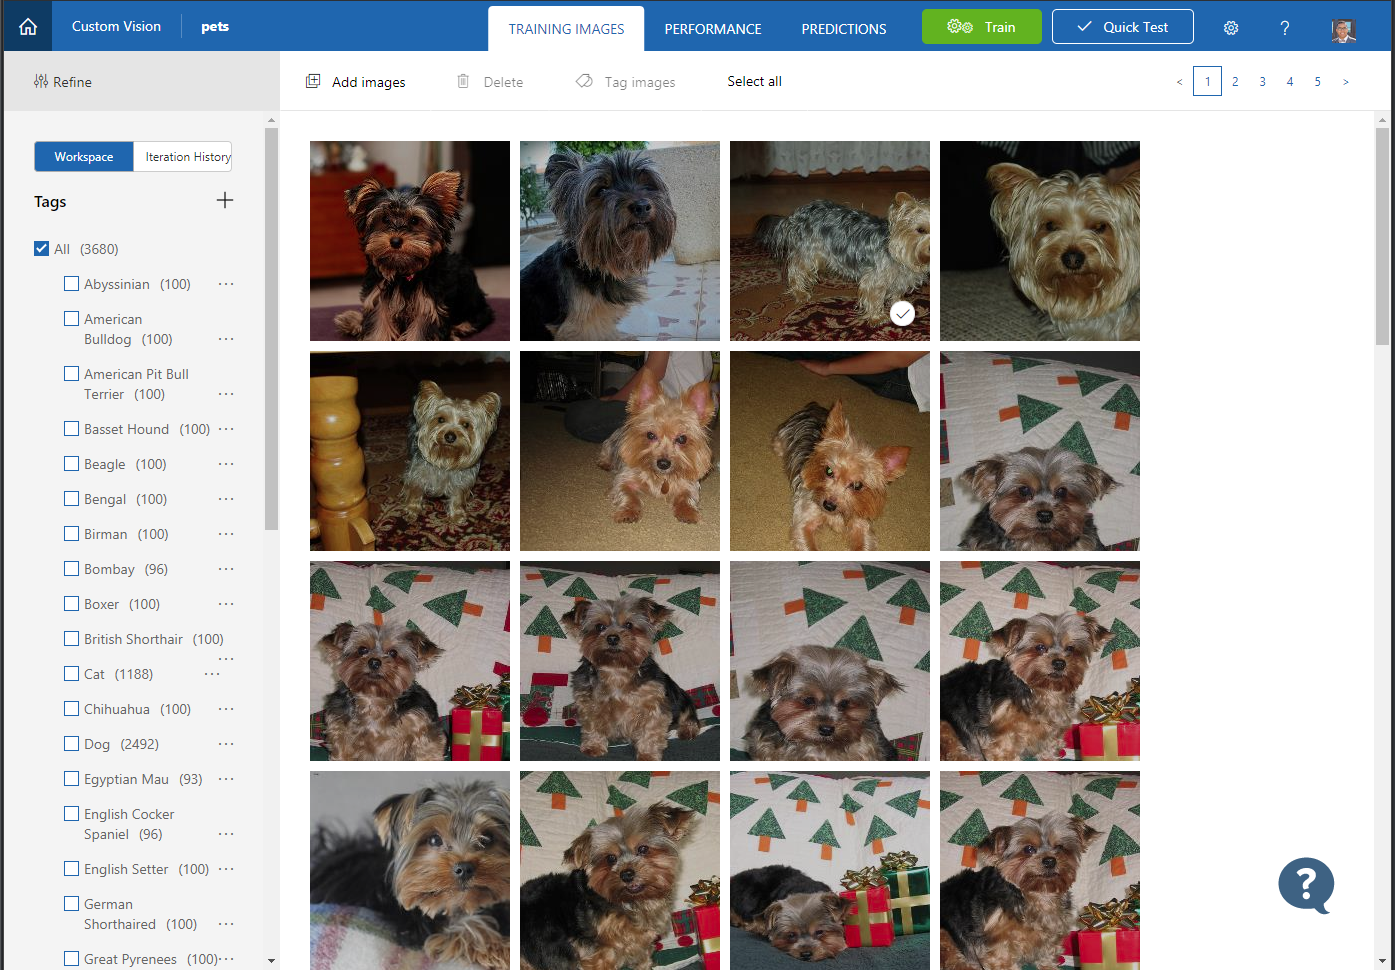

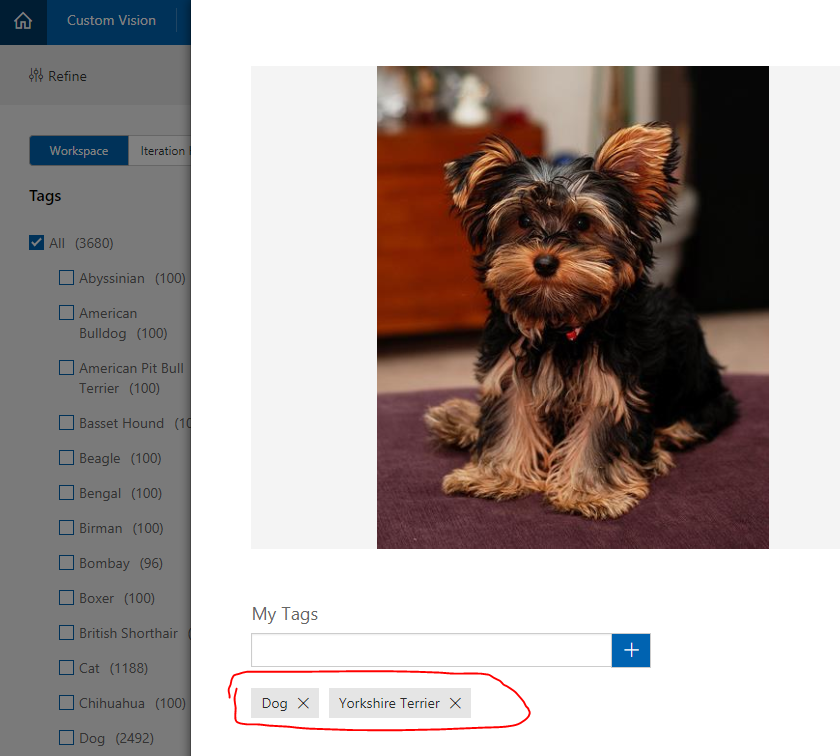

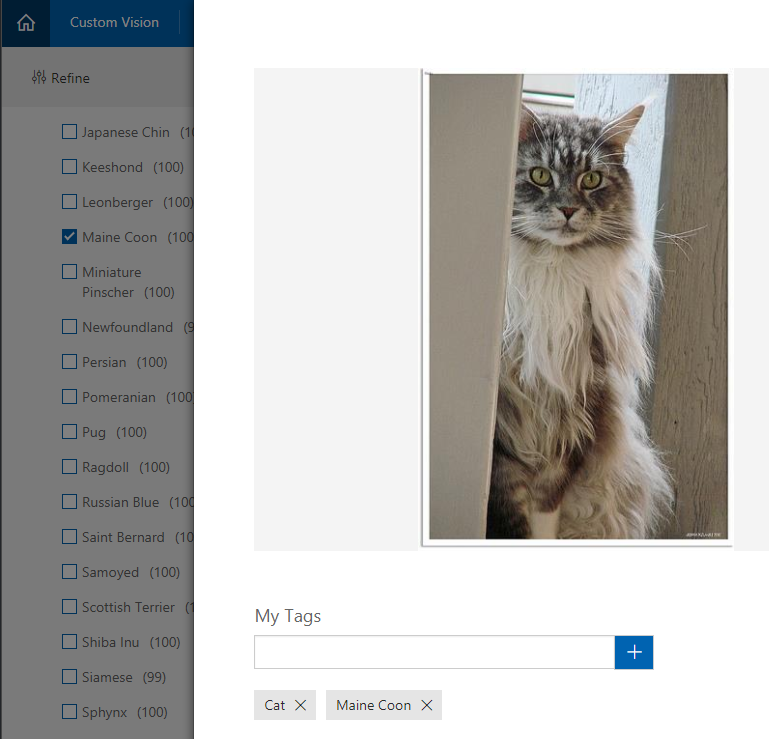

## Training

Training was performed by clicking the "Train" button in the Web GUI, although it can also be done programatically

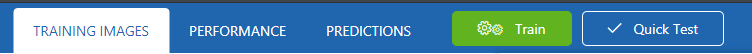

## Testing

In [16]:
from azure.cognitiveservices.vision.customvision.prediction import prediction_endpoint
from azure.cognitiveservices.vision.customvision.prediction.prediction_endpoint import models

In [55]:
def get_species_breed_prediction(predictions):
    '''
    Get the species and breed prediction, return as a list [species,breed]
    '''
    species_preds = {}
    breed_preds = {}
    
    for prediction in predictions:
    # Separate the species and breed predictions
        if prediction.tag == 'Cat':
            species_preds.update({prediction.tag:prediction.probability})
        elif prediction.tag == 'Dog':
            species_preds.update({prediction.tag:prediction.probability})
        else:
            breed_preds.update({prediction.tag:prediction.probability})
    
    # Determine the species and breed predictions based on max probability
    pred_species = max(species_preds.keys(), key=(lambda key: species_preds[key]))
    pred_breed = max(breed_preds.keys(), key=(lambda key: breed_preds[key]))
    
    # pred_species_probability = species_preds.get(pred_species)
    # pred_breed_probability = breed_preds.get(pred_breed )
    
    return [pred_species, pred_breed]

In [56]:
# Set test records for Azure Model
test_records = df_summary[df_summary['TrainTest'] == 'Test']

In [57]:
# Print number of test records
len(test_records)

3669

In [58]:
# Peek at test records
test_records.head()

Image  ID  Species  Breed            Filename SpeciesName  \
3680  Abyssinian_201   1        1      1  Abyssinian_201.jpg         Cat   
3681  Abyssinian_202   1        1      1  Abyssinian_202.jpg         Cat   
3682  Abyssinian_204   1        1      1  Abyssinian_204.jpg         Cat   
3683  Abyssinian_205   1        1      1  Abyssinian_205.jpg         Cat   
3684  Abyssinian_206   1        1      1  Abyssinian_206.jpg         Cat   

       BreedName TrainTest  
3680  Abyssinian      Test  
3681  Abyssinian      Test  
3682  Abyssinian      Test  
3683  Abyssinian      Test  
3684  Abyssinian      Test

In [59]:
predictor = prediction_endpoint.PredictionEndpoint(prediction_key)

In [60]:
# Making a copy of the data frame, will save results to CSV so I don't have to re-test by uploading thousands of examples
df_azure_predictions = test_records.copy()
df_azure_predictions['AzurePred_Species'] = 0
df_azure_predictions['AzurePred_Breed'] = 0
df_azure_predictions.head()

Image  ID  Species  Breed            Filename SpeciesName  \
3680  Abyssinian_201   1        1      1  Abyssinian_201.jpg         Cat   
3681  Abyssinian_202   1        1      1  Abyssinian_202.jpg         Cat   
3682  Abyssinian_204   1        1      1  Abyssinian_204.jpg         Cat   
3683  Abyssinian_205   1        1      1  Abyssinian_205.jpg         Cat   
3684  Abyssinian_206   1        1      1  Abyssinian_206.jpg         Cat   

       BreedName TrainTest  AzurePred_Species  AzurePred_Breed  
3680  Abyssinian      Test                  0                0  
3681  Abyssinian      Test                  0                0  
3682  Abyssinian      Test                  0                0  
3683  Abyssinian      Test                  0                0  
3684  Abyssinian      Test                  0                0

** RUNNING THE BELOW CELL WILL TAKE A LONG TIME ON A STANDARD MACHINE/CONNECTION.  IT WAS PERFORMED OVER A GIGABIT INTERNET CONNECTION **

In [202]:
# Upload a training image and log the predictions into the data frame.  Commenting out so I don't upload again by mistake
'''
print('Uploading and scoring {} images.'.format(len(df_azure_predictions)))
time1 = time.time()

for i in range(len(df_azure_predictions)):
    record = df_azure_predictions.iloc[i]
    image_path = base_dir + record['Filename']
    
    # Upload the image to azure, get the prediction tags
    with open(image_path, mode="rb") as test_data:
        results = predictor.predict_image(project.id, test_data.read())

    # Parse the predictions for species and breed
    prediction_values = get_species_breed_prediction(results.predictions)
    prediction_ids = [dict_lookup_speciesname_id.get(prediction_values[0]),dict_lookup_breedname_id.get(prediction_values[1])]
    prediction = {record['Image']:prediction_ids}
    # print('Image {}, Azure Prediction: Species = {}, Breed = {}'.format(record['Image'],prediction_values[0],prediction_values[1]))

    # Update the predictions dataframe with the prediction results
    df_azure_predictions.loc[df_azure_predictions.Image == record['Image'],
                             ['AzurePred_Species','AzurePred_Breed']] = prediction_ids[0],prediction_ids[1]

time2 = time.time()
print('Uploading and scoring complete after {} minutes'.format((time2 - time1) / 60.0))
'''

Uploading and scoring 3669 images.
Uploading and scoring complete after 30.006573947270713 minutes


In [215]:
# Save predictions to csv
# df_azure_predictions.to_csv('kc_pet_azure_predictions_04042018.csv',index=False)

In [61]:
# load predictions from csv
df_azure_predictions = pd.read_csv('kc_pet_azure_predictions_04042018.csv',header='infer')
df_azure_predictions.head()

Image  ID  Species  Breed            Filename SpeciesName  \
0  Abyssinian_201   1        1      1  Abyssinian_201.jpg         Cat   
1  Abyssinian_202   1        1      1  Abyssinian_202.jpg         Cat   
2  Abyssinian_204   1        1      1  Abyssinian_204.jpg         Cat   
3  Abyssinian_205   1        1      1  Abyssinian_205.jpg         Cat   
4  Abyssinian_206   1        1      1  Abyssinian_206.jpg         Cat   

    BreedName TrainTest  AzurePred_Species  AzurePred_Breed  
0  Abyssinian      Test                  1               32  
1  Abyssinian      Test                  1                1  
2  Abyssinian      Test                  1               11  
3  Abyssinian      Test                  1                1  
4  Abyssinian      Test                  1               21

In [62]:
# Species Accuracy
total_test_records = len(test_records)
correct_species = len(df_azure_predictions[df_azure_predictions.Species == df_azure_predictions.AzurePred_Species])
species_accuracy = correct_species/total_test_records
species_accuracy

0.9719269555737258

In [63]:
# Breed Accuracy
correct_breeds = len(df_azure_predictions[df_azure_predictions.Breed == df_azure_predictions.AzurePred_Breed])
breed_accuracy = correct_breeds/total_test_records
breed_accuracy

0.03188879803761243

In [64]:
results.loc[len(results)] = ['Azure Cognitive Service Model - Species & Breed',species_accuracy,breed_accuracy]

In [77]:
# Look at results thus far
results

Model  Accuracy_Species  \
0                                   Baseline Model          0.500681   
1  Azure Cognitive Service Model - Species & Breed          0.971927   

   Accuracy_Breed  
0        0.024257  
1        0.031889

## Phase 1 - Findings So Far

The Azure cognitive service model has performed very well on binary classification for cat vs dog, but not as well as I would have expected for multiclass classification for the Breed.  I belive that there may be a flaw in my methodology that I may alter.  Currently, each picture is labeled Cat/Dog, along with another label for the breeed.  I am determining the Cat/Dog binary classification result by only looking at dog and cat predicted label from the web service result, then taking the label of the two with the highest probability.  After that, I look for the predicted breed tag with the highest probability and take that as the predicted breed label.

I believe the issue here is that I am using a single model for binary and multiclass classification.  I can either remove the dog/cat tags from all labeled images and simply create a multiclass classification for breed, or have two separate models: one trained for binary species classification and one for multiclass classification of breed.  I will reconsider future approaches after the Keras Model is completed.

The initial results make me weary whether or not my custom Keras/Tensorflow model will be able to beat 3%, but we shall see in the coming days of the project.

As I get further into the project, I will also clean up the code to utilize and share more functions across the notebook, to make it more readable and reproducible.  Even though the data transformations do not technically utilize sklearn pipeline, and Azure Custom Vision service does not use pipelines, I can research my options.

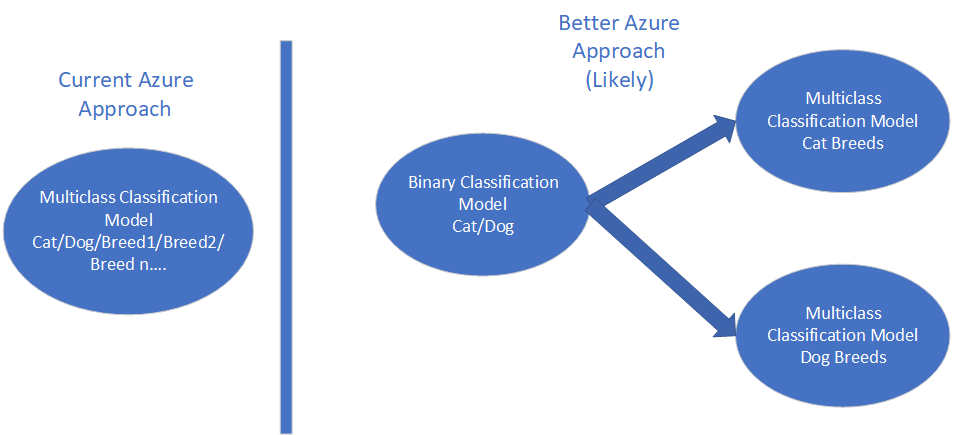

# Model 2 - Keras/Tensorflow Model

For this section, I will attempt to use Keras.  Keras is a high level abrstraction for designing neural networks with popular backends such as Tensorflow, Theano and Microsoft CNTK.  GPU acceleration for neural networks can yield massive perofrmance gains over CPU computation.  My Dekstop has a powerful NVIDIA GPU so I will leverage that when possible when training my neural network for performance purposes.

KC Computer Specs:
- Core i7 6700K, 4.5Ghz
- 32GB System RAM
- NVIDIA GTX 1080 GPU (8GB VIDEO RAM)

To properly utilize GPU acceleration, I had to install and configure the following on my machine:
- NVIDIA CUDA Toolkit 0.9 (https://developer.nvidia.com/cuda-toolkit-archive)
- NVIDIA cuDNN 7.1.2 for CUDA 9.0 (https://developer.nvidia.com/cudnn) (**ERROR, ROLLED BACK VERSION 4/15/2018**)
- NVIDIA cuDNN 7.0.5 for CUDA 9.0 (**WORKS**)
- tensorflow-gpu python package (v1.7.0)
- keras python package (v2.1.5)

**Note**:

Keras/tensorflow for deep neural nets does not have pipeline implementations like sklearn.  My original project submission (which was accepted/approved) mentioned that I would be utilizing Keras + Tensorflow, so I do not beleive I should be penalized for this.

In [17]:
%matplotlib inline

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.python.client import device_lib
import keras as k
from keras import backend as K

C:\toolkits.win\anaconda3-5.1.0\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
print('Keras Version',k.__version__,
     '\n',
     'Tensorflow Version',tf.__version__,
     '\n',
      'CPU/GPU SPECS:',
      '\n*****\n',
     device_lib.list_local_devices())

Keras Version 2.1.5 
 Tensorflow Version 1.7.0 
 CPU/GPU SPECS: 
*****
 [name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11604019154770186792
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6689651425
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1330723240710953760
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [15]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

## Pre Processing - Data Directory Structure

Tensorflow works well with one label per directory of files for training and validation.  I will have to organize the files on disk to be utilized properly by tensoflow.

We will use the same training and test data, but the keras model will have a validation test set equal to 40% of the training data.  The data will be broken down as follows:

~50% Training Data, 3680 records (Same training data as the Azure Model)

~20% Validation Data, 1472 records

~30% Testing Data, 2197 records

In [19]:
import os
from shutil import copyfile

In [20]:
# Define Dataframe for keras
df_summary_keras = df_summary.copy()
# Set portion of test records to validation
df_val = df_summary_keras[df_summary_keras.TrainTest == 'Test'].sample(1472, random_state=42)
df_val['TrainTest'] = 'Validation'
df_summary_keras.update(df_val)

In [14]:
df_summary_keras.groupby(['TrainTest']).agg('count')['ID']

TrainTest
Test          2197
Train         3680
Validation    1472
Name: ID, dtype: int64

In [113]:
df_summary_keras.head()

Image   ID  Species  Breed            Filename SpeciesName  \
0  Abyssinian_100  1.0      1.0    1.0  Abyssinian_100.jpg         Cat   
1  Abyssinian_101  1.0      1.0    1.0  Abyssinian_101.jpg         Cat   
2  Abyssinian_102  1.0      1.0    1.0  Abyssinian_102.jpg         Cat   
3  Abyssinian_103  1.0      1.0    1.0  Abyssinian_103.jpg         Cat   
4  Abyssinian_104  1.0      1.0    1.0  Abyssinian_104.jpg         Cat   

    BreedName TrainTest  
0  Abyssinian     Train  
1  Abyssinian     Train  
2  Abyssinian     Train  
3  Abyssinian     Train  
4  Abyssinian     Train

In [15]:
def create_directory(path):
   if not os.path.exists(path):
    os.makedirs(path)

In [16]:
def copy_ifnotexists(src_path, dst_path):
    exists = os.path.isfile(dst_path) 
    if not exists:
        copyfile(src_path, dst_path)

In [116]:
# Create new directories
create_directory('data')
create_directory('data/train')
create_directory('data/validation')
create_directory('data/test')
create_directory('data/train/cat')
create_directory('data/train/dog')
create_directory('data/validation/cat')
create_directory('data/validation/dog')

In [117]:
def move_pet_keras_files(dataframe):

    source_dir = 'images/'
    
    dest_train_cat_dir = 'data/train/cat/'
    dest_train_dog_dir = 'data/train/dog/'
    dest_val_cat_dir = 'data/validation/cat/'
    dest_val_dog_dir = 'data/validation/dog/'
    dest_test_dir = 'data/test/'
    
    # copy all images from source directory into respective keras directories
    for i in range(len(df_summary_keras)):
        record = df_summary_keras.iloc[i]
        filename = record['Filename']
        source_path = source_dir + filename
        
        if record['TrainTest'] == 'Test':
            copy_ifnotexists(source_path, dest_test_dir+filename)
    
        if record['TrainTest'] == 'Validation':
            if record['SpeciesName'] == 'Cat':
                copy_ifnotexists(source_path, dest_val_cat_dir+filename)
            else:
                copy_ifnotexists(source_path, dest_val_dog_dir+filename)
        
        if record['TrainTest'] == 'Train':
            if record['SpeciesName'] == 'Cat':
                copy_ifnotexists(source_path, dest_train_cat_dir+filename)
            else:
                copy_ifnotexists(source_path, dest_train_dog_dir+filename)

In [118]:
# Move the files into the proper keras directories
move_pet_keras_files(df_summary_keras)

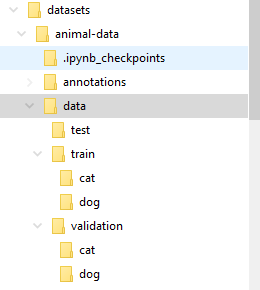

Directories created and data moves as seen above.

## Pre Processing - Image Augmentation

I have read/learned that when working with image data for neural networks, it is a good practice to create more training data by shifting/augmenting the images slightly.  Keras makes this really easy via the API.  Below, I will show how one image of the dog can generate multiple other images of dogs for training so that the model generalizes better.

In [25]:
# For Memory Management/Session Config
from keras.backend.tensorflow_backend import set_session

# For Model Creation
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers import MaxPooling2D, MaxPooling1D, GlobalMaxPooling2D, Conv2D, GlobalMaxPool2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from matplotlib.pyplot import imshow
from PIL import Image

In [26]:
# Tensorflow Session Config
config = tf.ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
config.gpu_options.visible_device_list = "0"
set_session(tf.Session(config=config))

In [27]:
# set the image ordering to tensorflow backend format, otherwise it will think Theano
K.set_image_dim_ordering('th')

In [28]:
def load_images_keras(path):
    image = load_img(path, target_size=(150,150))
    # imshow(np.asarray(image))
    x = img_to_array(image)
    x = x.reshape((1,) + x.shape)
    return x

(1, 3, 150, 150)

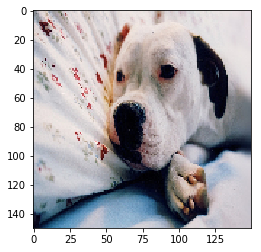

In [21]:
# Test Image Loader
test_image = load_images_keras('data/train/dog/american_bulldog_113.jpg')
test_image.shape

In [22]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [22]:
img = load_img('data/train/dog/american_bulldog_113.jpg', target_size=(150,150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for image_batch in datagen.flow(x, batch_size=1,
                          save_to_dir='augmented',
                          save_prefix='dog',
                          save_format='jpg'):
    i += 1
    if i > 25:
        break

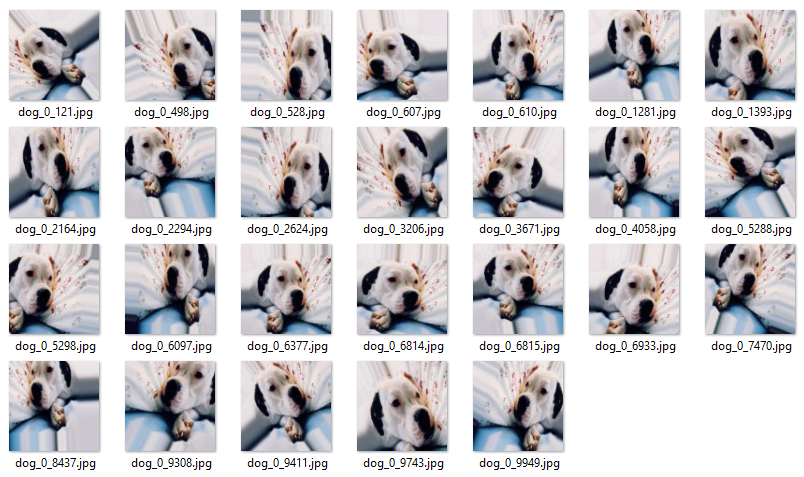

Images above are augmented/generated images from the prior sample

## Keras Model - Iteration 1

In [29]:
import time
import json

In [49]:
create_directory('saved_models')

In [30]:
def save_keras_model(model,prefix,version):
    parent_dir = 'saved_models/'
    
    # Save the model as json
    model_filename = parent_dir + prefix + '_model_' + version + '.json'
    model_json = model.to_json()
    with open(model_filename, "w") as json_file:
        json_file.write(model_json)
    
    # Save the weights
    weights_filename = parent_dir + prefix + '_weights_' + version + '.h5'
    model.save_weights(weights_filename)
    
    print('{} was saved successfully'.format(model_filename))
    print('{} was saved successfully'.format(weights_filename))

In [16]:
# init the model
model = Sequential()

In [17]:
# Input Layer
model.add(Conv2D(32, (3, 3), input_shape=(3, 150, 150)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [18]:
model.add(Flatten())  # flatten into 1d feature array/vector
# model.add(GlobalMaxPooling2D())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [19]:
batch_size = 16

# Augment Images
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# Will add all the steps from the above Image Generator once this is working
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 3680 images belonging to 2 classes.
Found 1472 images belonging to 2 classes.


### Training

In [22]:
# Time Begin
start = time.time()
print("Begin Timing & Model Training")

# Train Model
model.fit_generator(
    train_generator,
    verbose=2,
    steps_per_epoch=1900 // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=600 // batch_size)

# Time End
end = time.time()
end_mins = (end - start)/60.0
print('Training Time was {} minutes'.format(end_mins))

Begin Timing
Epoch 1/30
 - 27s - loss: 0.6559 - acc: 0.6737 - val_loss: 0.5879 - val_acc: 0.6841
Epoch 2/30
 - 24s - loss: 0.6232 - acc: 0.6711 - val_loss: 0.5439 - val_acc: 0.6909
Epoch 3/30
 - 17s - loss: 0.5961 - acc: 0.6774 - val_loss: 0.5463 - val_acc: 0.6841
Epoch 4/30
 - 16s - loss: 0.5865 - acc: 0.6944 - val_loss: 0.5429 - val_acc: 0.7382
Epoch 5/30
 - 15s - loss: 0.5775 - acc: 0.6986 - val_loss: 0.5352 - val_acc: 0.6959
Epoch 6/30
 - 17s - loss: 0.5574 - acc: 0.7135 - val_loss: 0.5001 - val_acc: 0.7517
Epoch 7/30
 - 15s - loss: 0.5704 - acc: 0.7071 - val_loss: 0.5507 - val_acc: 0.7095
Epoch 8/30
 - 16s - loss: 0.5602 - acc: 0.7188 - val_loss: 0.4933 - val_acc: 0.7551
Epoch 9/30
 - 16s - loss: 0.5490 - acc: 0.7293 - val_loss: 0.4945 - val_acc: 0.7601
Epoch 10/30
 - 16s - loss: 0.5337 - acc: 0.7373 - val_loss: 0.5605 - val_acc: 0.7416
Epoch 11/30
 - 15s - loss: 0.5351 - acc: 0.7500 - val_loss: 0.5227 - val_acc: 0.7483
Epoch 12/30
 - 16s - loss: 0.5208 - acc: 0.7421 - val_loss: 0

In [59]:
# Save Model & Weights
save_keras_model(model,'cnn_sequential','1')

saved_models/cnn_sequential_model_1.json was saved successfully
saved_models/cnn_sequential_weights_1.h5 was saved successfully


The initial model had a training accuracy of 0.7987 and validation accuracy of 0.8024, not bad.

### Technical Errors and Resolution

** KC Munnings 4/11/2018**

GPU is being used, but model training crashes on the first epoch.  Jupyter Python Kernel keeps crashing here, I am in the process of debugging.  It may be related to GPU RAM availability but will require some troubleshooting resolve.

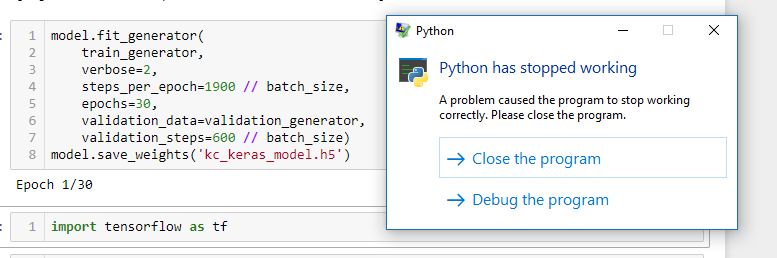

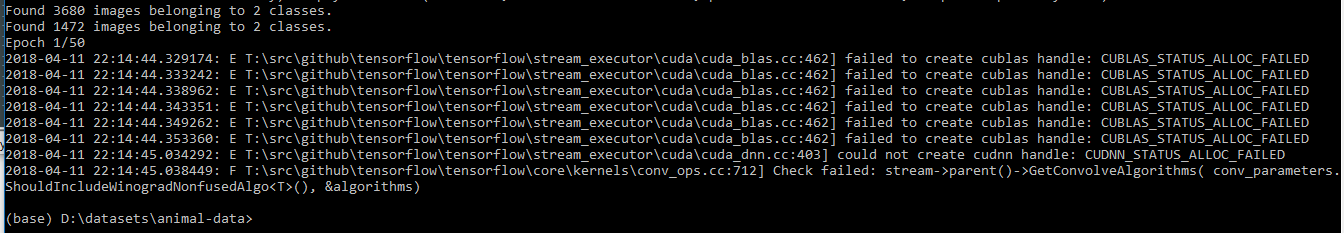

Error Text from standalone run outisde Jupyter:

Epoch 1/50
2018-04-11 22:14:44.329174: E T:\src\github\tensorflow\tensorflow\stream_executor\cuda\cuda_blas.cc:462] failed to create cublas handle: CUBLAS_STATUS_ALLOC_FAILED

2018-04-11 22:14:44.333242: E T:\src\github\tensorflow\tensorflow\stream_executor\cuda\cuda_blas.cc:462] failed to create cublas handle: CUBLAS_STATUS_ALLOC_FAILED

2018-04-11 22:14:44.338962: E T:\src\github\tensorflow\tensorflow\stream_executor\cuda\cuda_blas.cc:462] failed to create cublas handle: CUBLAS_STATUS_ALLOC_FAILED

2018-04-11 22:14:44.343351: E T:\src\github\tensorflow\tensorflow\stream_executor\cuda\cuda_blas.cc:462] failed to create cublas handle: CUBLAS_STATUS_ALLOC_FAILED

2018-04-11 22:14:44.349262: E T:\src\github\tensorflow\tensorflow\stream_executor\cuda\cuda_blas.cc:462] failed to create cublas handle: CUBLAS_STATUS_ALLOC_FAILED

2018-04-11 22:14:44.353360: E T:\src\github\tensorflow\tensorflow\stream_executor\cuda\cuda_blas.cc:462] failed to create cublas handle: CUBLAS_STATUS_ALLOC_FAILED

2018-04-11 22:14:45.034292: E T:\src\github\tensorflow\tensorflow\stream_executor\cuda\cuda_dnn.cc:403] could not create cudnn handle: CUDNN_STATUS_ALLOC_FAILED

2018-04-11 22:14:45.038449: F T:\src\github\tensorflow\tensorflow\core\kernels\conv_ops.cc:712] Check failed: stream->parent()->GetConvolveAlgorithms( conv_parameters.ShouldIncludeWinogradNonfusedAlgo<T>(), &algorithms)

### Dr. Shanahan Project Feedback, Lab Session 4/14/2018

** FEEDBACK/NOTES FROM DR. SHANAHAN **

Dr. Shanahan said that my project appears to be going well and likes my problem.  He advised that I need to get my GPU drivers/model working, then look at performing grid search. He suggested the folollowing link https://stackoverflow.com/questions/42415076/how-to-insert-keras-model-into-scikit-learn-pipeline to explore the possibility of using scikitlearn pipeline with Keras.  I don't fully understand how I can recieve such low marks (Phase 1) when the Professor said my effort is very good, but that is another discussion...

** 4/15/2018 Found resolution **

After a lot of debugging and digging through logs, I found the following error related to compatability levels with cuDNN. 

1. I rolled back the cuDNN version from 7.1.1 to 7.0.5.
2. I also specified some tensorflow session configuration options to allow memory growth:

    config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
config.gpu_options.visible_device_list = "0"
set_session(tf.Session(config=config))

### Testing

In [42]:
# Load the model to test images
from keras.models import load_model
from keras.models import model_from_json

In [41]:
def load_keras_model(model_name,version):
    parent_dir = 'saved_models/'
    
    
    model_filename = parent_dir + model_name + '_model_' + version + '.json'
    weights_filename = parent_dir + model_name + '_weights_' + version + '.h5'
    
    # Load Model
    with open(model_filename,"r") as json_file:
        loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)
    
    # Load Weights
    loaded_model.load_weights(weights_filename)
    print("Loaded model {}, version {} from disk".format(model_name,version))
    
    return loaded_model

In [42]:
# Load Model
LOADED_MODEL = load_keras_model('cnn_sequential','1')

# Compile Model
LOADED_MODEL.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Loaded model cnn_sequential, version 1 from disk


[[1]]


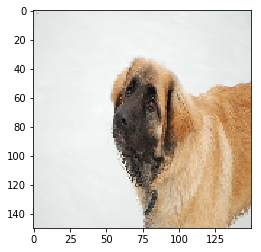

In [45]:
# Make a single test prediction
x = load_images_keras('data/test/leonberger_3.jpg')
classes = LOADED_MODEL.predict_classes(x)
print(classes)

[[0]]


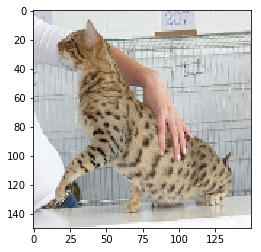

In [101]:
# Make a single test prediction
x = load_images_keras('data/test/Bengal_2.jpg')
classes = LOADED_MODEL.predict_classes(x)
print(classes)

0 = Cat, 1 = Dog from CNN output.  Now that we have established functionality, we can begin to test.  

We will have to write some custom code to:

- Cleanup the labels.  CNN output has 0/1 (Cat/Dog), but the source data has 1/2 (Cat/Dog) as ground truth labels.
- Load up all the images from the test directory and score them with the model

In [46]:
def cnn_species_label_convert(label):
    if label == 0:
        return 1.0
    else:
        return 2.0

In [47]:
def score_image(filename):
    file_path = 'data/test/' + filename
    x = load_images_keras(file_path)
    y_hat = LOADED_MODEL.predict_classes(x)[0][0]
    y_hat = cnn_species_label_convert(y_hat)
    return y_hat

In [51]:
test_records_keras = df_summary_keras[df_summary_keras['TrainTest'] == 'Test'].copy()
test_records_keras

Image    ID  Species  Breed                  Filename  \
3681        Abyssinian_202   1.0      1.0    1.0        Abyssinian_202.jpg   
3682        Abyssinian_204   1.0      1.0    1.0        Abyssinian_204.jpg   
3683        Abyssinian_205   1.0      1.0    1.0        Abyssinian_205.jpg   
3684        Abyssinian_206   1.0      1.0    1.0        Abyssinian_206.jpg   
3685        Abyssinian_207   1.0      1.0    1.0        Abyssinian_207.jpg   
3686         Abyssinian_20   1.0      1.0    1.0         Abyssinian_20.jpg   
3688        Abyssinian_212   1.0      1.0    1.0        Abyssinian_212.jpg   
3689        Abyssinian_213   1.0      1.0    1.0        Abyssinian_213.jpg   
3690        Abyssinian_215   1.0      1.0    1.0        Abyssinian_215.jpg   
3691        Abyssinian_216   1.0      1.0    1.0        Abyssinian_216.jpg   
3693        Abyssinian_219   1.0      1.0    1.0        Abyssinian_219.jpg   
3695        Abyssinian_220   1.0      1.0    1.0        Abyssinian_220.jpg   
3696        Abyssinian_221   1.0      1.0    1.0        Abyssinian_221.jpg   
3698        Abyssinian_224   1.0      1.0    1.0        Abyssinian_224.jpg   
3699        Abyssinian_225   1.0      1.0    1.0        Abyssinian_225.jpg   
3700        Abyssinian_226   1.0      1.0    1.0        Abyssinian_226.jpg   
3701        Abyssinian_228   1.0      1.0    1.0        Abyssinian_228.jpg   
3703        Abyssinian_230   1.0      1.0    1.0        Abyssinian_230.jpg   
3704        Abyssinian_232   1.0      1.0    1.0        Abyssinian_232.jpg   
3707         Abyssinian_26   1.0      1.0    1.0         Abyssinian_26.jpg   
3708         Abyssinian_27   1.0      1.0    1.0         Abyssinian_27.jpg   
3714         Abyssinian_33   1.0      1.0    1.0         Abyssinian_33.jpg   
3715         Abyssinian_36   1.0      1.0    1.0         Abyssinian_36.jpg   
3716         Abyssinian_37   1.0      1.0    1.0         Abyssinian_37.jpg   
3717          Abyssinian_3   1.0      1.0    1.0          Abyssinian_3.jpg   
3718         Abyssinian_40   1.0      1.0    1.0         Abyssinian_40.jpg   
3719         Abyssinian_43   1.0      1.0    1.0         Abyssinian_43.jpg   
3720         Abyssinian_44   1.0      1.0    1.0         Abyssinian_44.jpg   
3722         Abyssinian_46   1.0      1.0    1.0         Abyssinian_46.jpg   
3726          Abyssinian_4   1.0      1.0    1.0          Abyssinian_4.jpg   
...                    ...   ...      ...    ...                       ...   
7302  yorkshire_terrier_58  37.0      2.0   25.0  yorkshire_terrier_58.jpg   
7303  yorkshire_terrier_59  37.0      2.0   25.0  yorkshire_terrier_59.jpg   
7306  yorkshire_terrier_61  37.0      2.0   25.0  yorkshire_terrier_61.jpg   
7308  yorkshire_terrier_63  37.0      2.0   25.0  yorkshire_terrier_63.jpg   
7310  yorkshire_terrier_65  37.0      2.0   25.0  yorkshire_terrier_65.jpg   
7311  yorkshire_terrier_66  37.0      2.0   25.0  yorkshire_terrier_66.jpg   
7312  yorkshire_terrier_67  37.0      2.0   25.0  yorkshire_terrier_67.jpg   
7314  yorkshire_terrier_69  37.0      2.0   25.0  yorkshire_terrier_69.jpg   
7315   yorkshire_terrier_6  37.0      2.0   25.0   yorkshire_terrier_6.jpg   
7316  yorkshire_terrier_70  37.0      2.0   25.0  yorkshire_terrier_70.jpg   
7317  yorkshire_terrier_71  37.0      2.0   25.0  yorkshire_terrier_71.jpg   
7318  yorkshire_terrier_72  37.0      2.0   25.0  yorkshire_terrier_72.jpg   
7319  yorkshire_terrier_73  37.0      2.0   25.0  yorkshire_terrier_73.jpg   
7320  yorkshire_terrier_74  37.0      2.0   25.0  yorkshire_terrier_74.jpg   
7321  yorkshire_terrier_75  37.0      2.0   25.0  yorkshire_terrier_75.jpg   
7322  yorkshire_terrier_76  37.0      2.0   25.0  yorkshire_terrier_76.jpg   
7323  yorkshire_terrier_77  37.0      2.0   25.0  yorkshire_terrier_77.jpg   
7325  yorkshire_terrier_79  37.0      2.0   25.0  yorkshire_terrier_79.jpg   
7329  yorkshire_terrier_82  37.0      2.0   25.0  yorkshire_terrier_82.jpg   
7331  yorkshire_terrier_84  37.0      2.0  

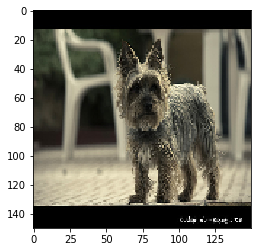

In [120]:
test_records_keras['Keras_Prediction'] = test_records_keras['Filename'].apply(score_image)

** Overall Accuracy **

In [126]:
keras_correct = len(test_records_keras[test_records_keras.Species == test_records_keras.Keras_Prediction])
keras_accuracy = keras_correct / len(test_records_keras)
keras_accuracy

0.7350933090578061

Overall accuracy is 73.5%, that seems very reasonable!  It is not as high as Azure Custom Vision Service, but it is a good effort.

** By Species, Very Interesting! **

In [131]:
test_records_keras.groupby(['Species','Keras_Prediction']).agg('count')['ID']

Species  Keras_Prediction
1.0      1.0                  151
         2.0                  549
2.0      1.0                   33
         2.0                 1464
Name: ID, dtype: int64

In [128]:
predictions = test_records_keras.groupby(['Species','Keras_Prediction']).agg('count')['ID']
true_labels = test_records_keras.groupby(['Species']).agg('count')['ID']
predictions.div(true_labels, level='Species') * 100

Species  Keras_Prediction
1.0      1.0                 21.571429
         2.0                 78.428571
2.0      1.0                  2.204409
         2.0                 97.795591
Name: ID, dtype: float64

In [135]:
# Training data class distribution
df_summary_keras[df_summary_keras.TrainTest == 'Train'].groupby(['SpeciesName']).agg('count')['ID']

SpeciesName
Cat    1188
Dog    2492
Name: ID, dtype: int64

### Recap - Iteration 1

The above results are very interesting.  The CNN classifier is able to predict dogs with 97% accuracy, but only able to predict cats with 78% accuracy.  This could be due to class imbalance on the training data for the model or perhaps cats are just harder to identify vs dogs visually.

With my current understanding of deep learning, it's associated frameworks and convolutional neural network architecture, I will continue to focus on the binary classification problem of cat/dog identification.  Multiclass classification with a Keras/Tensorflow model with 37 possible labels may be a tad ambitious within this scope.  Limiting the problem solution to binary classification is still valuable however, and can still answer the question of the financial viability of GUI/"easy" tooling for machine learning vs more expensive custom solutioning.

Within the first iteration, one of the primary blockers that had to be overcome was version incompatabilities between CUDA, cuDNN, Tensorflow and Keras.  It took quite a bit of debugging to solve that issue, but I beleive the end result of having working GPU accelerated deep learning on a Windows environment was worth it.

## Keras Model  Iteration 2

In [28]:
# Create Model 2.  
# Try with 3 fully connected layers after input 
# and increased/decreased value on training image generator hyperparms
# and less image augmentation, could be adding confusion to cat/dog convolutional layers
# 30 epochs
model2 = Sequential()

In [29]:
# Input Layer, Same as Model 1
model2.add(Conv2D(32, (3, 3), input_shape=(3, 150, 150)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 1
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 4
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())  # flatten into 1d feature array/vector
# model2.add(GlobalMaxPooling2D())

model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1))
model2.add(Activation('sigmoid')) # Trying softmax instead of sigmoid

In [30]:
model2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [31]:
batch_size = 16

# Augment Images (doubled the shear and zoom values for augmented images)
train_datagen = ImageDataGenerator(
        rescale=1./255)

# Rescale testing images
test_datagen = ImageDataGenerator(rescale=1./255)

# Create Generators
train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 3680 images belonging to 2 classes.
Found 1472 images belonging to 2 classes.


### Training

In [36]:
# Time Begin
start = time.time()
print("Begin Timing & Model Training")

# Train Model
model2.fit_generator(
    train_generator,
    verbose=2,
    steps_per_epoch=1900 // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=600 // batch_size)

# Time End
end = time.time()
end_mins = (end - start)/60.0
print('Training Time was {} minutes'.format(end_mins))

Begin Timing & Model Training
Epoch 1/30
 - 16s - loss: 0.6271 - acc: 0.6880 - val_loss: 0.5854 - val_acc: 0.6689
Epoch 2/30
 - 14s - loss: 0.6151 - acc: 0.6700 - val_loss: 0.5677 - val_acc: 0.6689
Epoch 3/30
 - 9s - loss: 0.5861 - acc: 0.6939 - val_loss: 0.6189 - val_acc: 0.6824
Epoch 4/30
 - 9s - loss: 0.5722 - acc: 0.7013 - val_loss: 0.5442 - val_acc: 0.7466
Epoch 5/30
 - 9s - loss: 0.5451 - acc: 0.7304 - val_loss: 0.5090 - val_acc: 0.7635
Epoch 6/30
 - 9s - loss: 0.5067 - acc: 0.7606 - val_loss: 0.4929 - val_acc: 0.7736
Epoch 7/30
 - 8s - loss: 0.4895 - acc: 0.7775 - val_loss: 0.4904 - val_acc: 0.7584
Epoch 8/30
 - 9s - loss: 0.5024 - acc: 0.7648 - val_loss: 0.5117 - val_acc: 0.7601
Epoch 9/30
 - 9s - loss: 0.4559 - acc: 0.7839 - val_loss: 0.4712 - val_acc: 0.7720
Epoch 10/30
 - 9s - loss: 0.4311 - acc: 0.7966 - val_loss: 0.4542 - val_acc: 0.7905
Epoch 11/30
 - 9s - loss: 0.4115 - acc: 0.8141 - val_loss: 0.6262 - val_acc: 0.7534
Epoch 12/30
 - 9s - loss: 0.4151 - acc: 0.8204 - val_

In [39]:
# Save Model & Weights
save_keras_model(model2,'cnn_sequential','2')

saved_models/cnn_sequential_model_2.json was saved successfully
saved_models/cnn_sequential_weights_2.h5 was saved successfully


### Testing

In [43]:
# Load Model
LOADED_MODEL = load_keras_model('cnn_sequential','2')

# Compile Model
LOADED_MODEL.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Loaded model cnn_sequential, version 2 from disk


In [44]:
def test_model(model,test_df):
    df_test_records = test_df[test_df['TrainTest'] == 'Test'].copy()

    # Test against dataframe
    df_test_records['Keras_Prediction'] = df_test_records['Filename'].apply(score_image)

    # Overall Accuracy
    keras_correct = len(df_test_records[df_test_records.Species == df_test_records.Keras_Prediction])
    keras_accuracy = keras_correct / len(df_test_records)
    keras_accuracy

    # Accuracy by species
    predictions = df_test_records.groupby(['Species','Keras_Prediction']).agg('count')['ID']
    true_labels = df_test_records.groupby(['Species']).agg('count')['ID']
    species_preds = predictions.div(true_labels, level='Species') * 100

    print('Overall Accuracy was {}'.format(keras_accuracy))
    print('\n')
    print(predictions)
    print('\n')
    
    print(true_labels)
    print('\n')
    print('Accuracy by Species was: \n{}'.format(species_preds))
    return keras_accuracy

In [52]:
acc = test_model(LOADED_MODEL,test_records_keras)

Overall Accuracy was 0.7532999544833865


Species  Keras_Prediction
1.0      1.0                  211
         2.0                  489
2.0      1.0                   53
         2.0                 1444
Name: ID, dtype: int64


Species
1.0     700
2.0    1497
Name: ID, dtype: int64


Accuracy by Species was: 
Species  Keras_Prediction
1.0      1.0                 30.142857
         2.0                 69.857143
2.0      1.0                  3.540414
         2.0                 96.459586
Name: ID, dtype: float64


For the second iteration above I tried tuning multiple aspects of the model which are not shown.  In many instances, augmenting images slightly to generate more training data is a good idea.  In this case, however, I went a bit overboard with the training data generator and tried adding a lot of different values:  horizontal flipping, fill modes, shear range, zoom ranges, shift ranges and rotation.  After giving this image data generator more thought, I believe that this adds confusion to the model since dogs and cats already have similar shapes.  If the images were augmented too heavily, it could possibly confuse the distinguishing features between cats and dogs.  In the final attempt for iteration 2, I stuck with simply rescaling to 150x150 pixels.  In addition, for the second iteration of the Keras model I tried 3 fully connected layers after the input layer an fewer epochs.

Overall accuracy was 70%, but again, the model is terrible at correctly classifying cats.  Of all the cat images it recieved, only 12% were correctly classified.  The model appears to be heavily biased towards just picking dogs and that may be a function of imbalanced labels on the training data.  I wanted to pick the same train/test images as the original dataset author for an apples-to-apples comparison, but perhaps random train/test split would be a better approach or changing my sampling method to pick the same number of training samples for each class.

However, for this experiment, we are using the same training and test data observations for the Azure and Keras models to compare learning and prediction performance on the same data.

# Model Comparison - Cost/Benefit

At this point in the process, the cost/benefit of using an easy online service looks good.  I've spent many hours working on Keras from a research, environment configuration and training/testing perspective.  Uploading the images to a cloud service and clicking a big "Train" button gave a model that is yielding better results and took far less time with 97% accuracy, versus 73.5% accuracy on the Keras model.  Final conclusions are yet to be drawn, but it looks as though east to use cloud services utilizing transfer learning with customizations can be used to quickly create classification models that perform well.

The results were as follows:

Binary Cat/Dog Classification Accuracy:
- Baseline Model, Random guess = 50%
- Azure Custom Vision Service = 97%
- Keras + Tensorflow, Best Model = 75%
- Keras + Tensorflow, Second Best Model = 74%

# Summary Report

The goal of the project was to test a hypothesis that with the availability of easy to use, GUI based machine learning tools available in the market today, an organization could create machine learning models with comparable performance to custom developed models by professional or amateur data scientists.  To perform this test, a classification problem involving a pet species and breeds dataset from Oxford University was approached.  During the project, I would create a classification model using the Azure Custom Vision Service which is a GUI tool for developing custom models.  Then, I compared performance with the same test/training data against a custom developed, convolutional neural network model implemented in Python using the Keras and Tensorflow libraries.  As an additional challenge, I also explored the use of GPU acceleration for neural network training for the custom model.  The dataset was comprised of 7319 pet (cat/dog) images of varying resolutions for 37 breeds.  Baseline model to compare both approaches to was random guessing 50% on binary classification task, and 3% on multiclass classification task.


For the Azure Custom Vision Service model, I chose to write custom Python functions to facilitate labeling and uploading the data to the service.  This could have been performed through the GUI but this approach was more repeatable and a better use of time.  After properly labeling and uploading the data, the training involved clicking a single button in the UI, which creates a model and web service.  Once the model web service was created, I scored the test data and captured the results.  The Custom Vision service yielded 97% accuracy on the test data set for dog/cat classification, and 3% on species classification.

For the Keras model, I chose to implement a convolutional neural network using Tensorflow backend.  Convolutional neural networks from my readings have been shown to perform well on image classification tasks.  The Keras model took a large amount of time to configure and prepare from a computer environment perspective.  This was not simply a pip install, but a large exercise in GPU driver framework, and external software dependencies.  After much effort, Keras was not crashing Python.  After performing pre-processing such as directory structure formatting, image standardization, image augmentation to generate additional training data within the model and tuning various hyperparameters, my best Keras model yielded 75% accuracy on the binary cat/dog classification tasks.  I decided to only compare the binary classification task as GPU accelerated CNNs were not covered in class, and properly implementing a CNN for multiclass proved to be a very ambitious undertaking on my own, with the timeframe given.
    
    
Overall, both models performed far above the baseline model on the binary classification task.  There are aspects of the project that could be further explored/improved on future iterations.  One area is to explore using multiple models in Azure Custom Vision Service (one for binary cat/dog, two more models trained only on specific cat/dog breeds) and passing data through both.  I believe this may lead to better overall results for breed classification from the service.  The second area, especially for the Keras model would be to address the class imbalance in the training data.  There are a larger number of dogs than cats represented in the training data, which led the custom model to perform well on dog classification and poorly on cat classification.  Based on the amount of time spent on both approaches, I believe that organizations can definitely find value (in terms of labor costs and time)  in GUI tools for machine learning, depending on the use case.


# Acknowledgements

Special thanks to the following sources for information that supported this project.

1. Keras Project - https://keras.io/
2. Tensorflow Project - https://www.tensorflow.org/
3. Oxford IIIT Pet Dataset - http://www.robots.ox.ac.uk/~vgg/data/pets/
4. Configuring GPU accelerated Keras in Windows 10 - https://research.wmz.ninja/articles/2017/01/configuring-gpu-accelerated-keras-in-windows-10.html
5. Microsoft Custom Vision Service - https://azure.microsoft.com/en-us/services/cognitive-services/custom-vision-service/